# Visualize Platemap

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(platetools))
suppressPackageStartupMessages(library(ggplot2))

In [2]:
data_file <- file.path("data", "training_data.csv")
train_df <- readr::read_csv(data_file, col_types = readr::cols())

dim(train_df)
head(train_df)

[1] 51267   123

cell_code,cell_id,plate,replicate,well,field,actin.s.area,actin.s.perimeter,actin.s.radius.mean,actin.s.radius.sd,⋯,DNA.h.ent.s3,DNA.h.dva.s3,DNA.h.den.s3,DNA.h.f12.s3,DNA.h.f13.s3,dist.10.nn,dist.20.nn,dist.30.nn,nuclear.displacement,target
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
OaJHcDs2kh,1,P1,1,C10,1,579,90,13.94276,4.352958,⋯,0,0,0,0,0,128.88952,178.59576,207.1874,5.9388822,adrenoceptor
nwLFF4l070,2,P1,1,C10,1,1132,136,20.17901,4.583255,⋯,0,0,0,0,0,79.88530,123.69747,190.5988,0.4780237,adrenoceptor
JU4SIplWZ7,3,P1,1,C10,1,736,99,15.20940,2.408709,⋯,0,0,0,0,0,64.37064,88.93167,127.4529,3.9283252,adrenoceptor
pqkTwaHa2L,4,P1,1,C10,1,611,92,14.39853,3.662234,⋯,0,0,0,0,0,87.53649,121.87917,160.7527,3.3360809,adrenoceptor
pB2BlQoW94,5,P1,1,C10,1,585,93,14.03067,3.408844,⋯,0,0,0,0,0,105.86673,142.02386,182.9900,2.3437761,adrenoceptor
ng7c7qtodJ,6,P1,1,C10,1,1926,209,25.39435,5.188380,⋯,0,0,0,0,0,104.69160,190.96170,218.9728,1.8205293,adrenoceptor


In [3]:
well_info_df <- train_df %>%
    dplyr::group_by(target, well) %>%
    dplyr::tally() %>%
    dplyr::arrange(target, desc(n))

output_file <- file.path("results", "well_target_counts.tsv")
readr::write_tsv(well_info_df, output_file)

head(well_info_df)

target,well,n
<chr>,<chr>,<int>
adrenoceptor,C10,1293
adrenoceptor,D15,1282
adrenoceptor,F18,1276
AMPA,E11,1281
AMPA,G12,1272
AMPA,K20,1271


Warning message:
“Invalid plate selection. The data given has more rows then number of wells.
Are you sure argument 'plate' is correct for the number of wells in your data?
note: Default is a 96-well plate.”

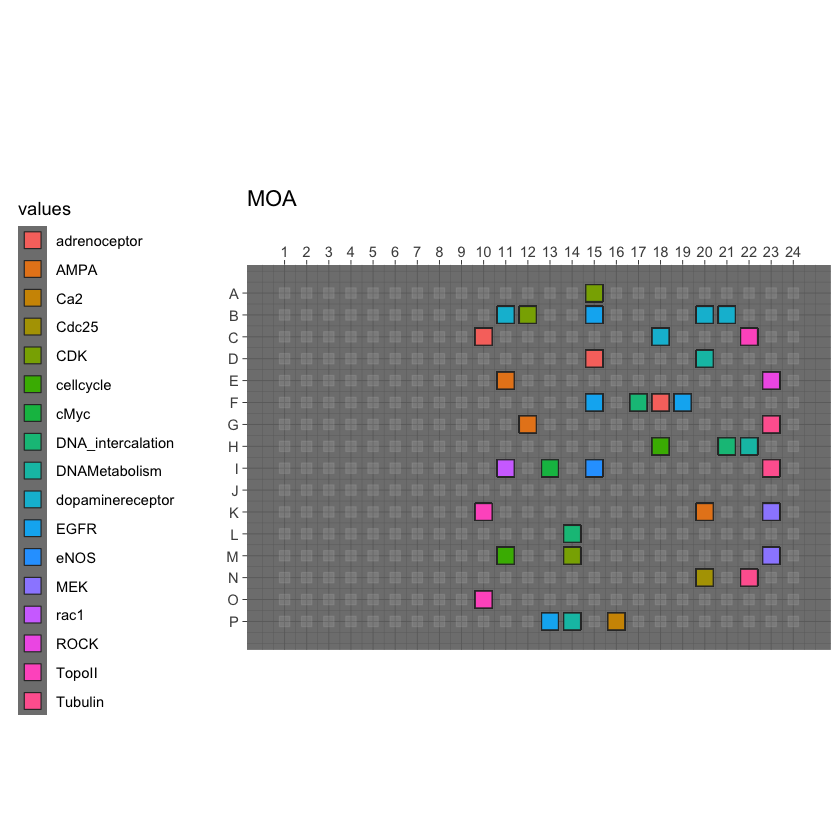

In [4]:
platetools::raw_map(data = train_df$target,
                    well = train_df$well,
                    plate = 384) +
    ggtitle("MOA") +
    theme_dark() +
    scale_fill_discrete() +
    theme(legend.position = "left")

fig_file <- file.path("figures", "moa_training_platemap.png")
ggsave(fig_file, height = 4, width = 6, dpi = 300)